<a href="https://colab.research.google.com/github/pttrilok/practical_deep_learning/blob/master/Lesson%2010%20Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this module you will learn about 

1. A working example code which can be used for face identification.
2. Making our own face identification model
3. Some basic image filter building from scratch

# ***A working example code which can be used for face identification.***

*Configure kaggle*

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Setting environment.......

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

Downloading dataset

In [ ]:
!kaggle datasets download -d hereisburak/pins-face-recognition

100% 370M/372M [00:06<00:00, 68.0MB/s]
100% 372M/372M [00:06<00:00, 63.6MB/s]


unzip dataset

In [ ]:
!unzip "pins-face-recognition.zip"

***Identification starts really ***

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("105_classes_pins_dataset"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

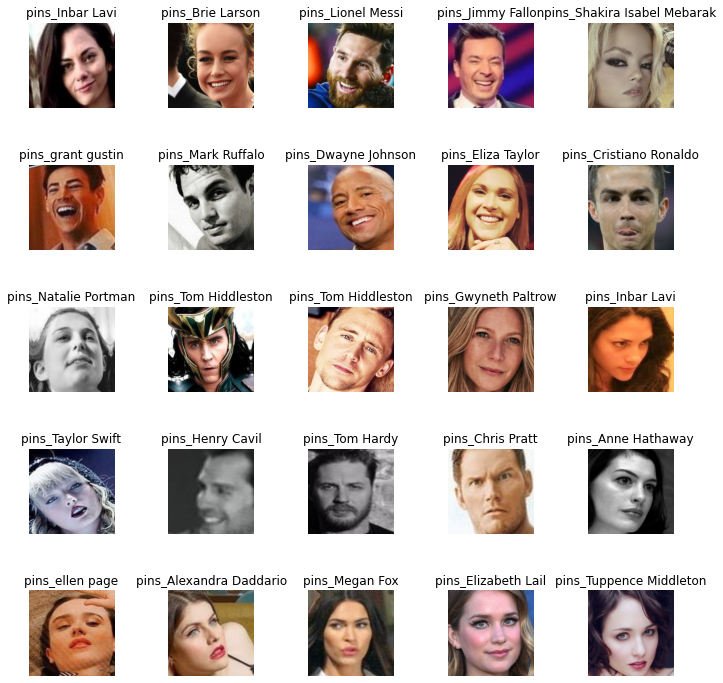

In [ ]:
data.show_batch(rows=5, figsize=(10,10))

In [ ]:
print(data.classes)
len(data.classes)

['pins_Adriana Lima', 'pins_Alex Lawther', 'pins_Alexandra Daddario', 'pins_Alvaro Morte', 'pins_Amanda Crew', 'pins_Andy Samberg', 'pins_Anne Hathaway', 'pins_Anthony Mackie', 'pins_Avril Lavigne', 'pins_Ben Affleck', 'pins_Bill Gates', 'pins_Bobby Morley', 'pins_Brenton Thwaites', 'pins_Brian J. Smith', 'pins_Brie Larson', 'pins_Chris Evans', 'pins_Chris Hemsworth', 'pins_Chris Pratt', 'pins_Christian Bale', 'pins_Cristiano Ronaldo', 'pins_Danielle Panabaker', 'pins_Dominic Purcell', 'pins_Dwayne Johnson', 'pins_Eliza Taylor', 'pins_Elizabeth Lail', 'pins_Emilia Clarke', 'pins_Emma Stone', 'pins_Emma Watson', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil', 'pins_Hugh Jackman', 'pins_Inbar Lavi', 'pins_Irina Shayk', 'pins_Jake Mcdorman', 'pins_Jason Momoa', 'pins_Jennifer Lawrence', 'pins_Jeremy Renner', 'pins_Jessica Barden', 'pins_Jimmy Fallon', 'pins_Johnny Depp', 'pins_Josh Radnor', 'pins_Katharine Mcphee', 'pins_Katherine Langford', 'pins_Keanu Reeves', 'pins_Krysten Ritter', 'pins_L

105

In [ ]:
resnet_learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
alexnet_learn=cnn_learner(data, models.alexnet, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
mobilenetv2_learn=cnn_learner(data, models.mobilenet_v2, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
resnet_learn.fit_one_cycle(16)

epoch,train_loss,valid_loss,error_rate,time
0,4.653037,3.298589,0.781232,02:40
1,3.535771,2.634517,0.656303,02:36
2,2.807902,2.179467,0.569025,02:34
3,2.360936,1.890091,0.504849,02:34
4,1.993760,1.557586,0.416144,02:32
5,1.634753,1.371508,0.364803,02:32
6,1.416460,1.195791,0.325157,02:31
7,1.204138,1.085420,0.287222,02:35
8,1.052680,0.978246,0.263833,02:32
9,0.910085,0.911172,0.242156,02:31


***Getting a test Image***

In [28]:
!wget -O "test.png" "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/191125_Taylor_Swift_at_the_2019_American_Music_Awards_%28cropped%29.png/220px-191125_Taylor_Swift_at_the_2019_American_Music_Awards_%28cropped%29.png"

--2020-08-22 12:25:24--  https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/191125_Taylor_Swift_at_the_2019_American_Music_Awards_%28cropped%29.png/220px-191125_Taylor_Swift_at_the_2019_American_Music_Awards_%28cropped%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115317 (113K) [image/png]
Saving to: ‘test.png’

test.png            100%[===================>] 112.61K  --.-KB/s    in 0.01s   

2020-08-22 12:25:24 (9.05 MB/s) - ‘test.png’ saved [115317/115317]



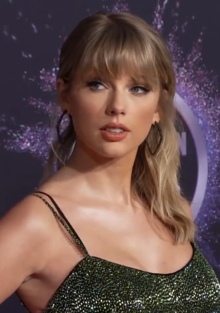

In [ ]:
test_image =open_image("test.png")
test_image

***Face finder function which we built previously***

In [ ]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def shape_to_list(shape):
    coords = []
    for i in range(0, 68):
        coords.append((shape.part(i).x, shape.part(i).y))
    return coords
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

extracting face from test image

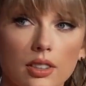

In [ ]:
test_face = face_finder("test.png")
test_face[0].save("test_face.png")
test_face[0]

***Getting prediction***

In [ ]:
my_image = open_image("test_face.png")

In [ ]:
%%time
pred_class,pred_idx,outputs = resnet_learn.predict(my_image)
print(pred_class)

pins_Taylor Swift
CPU times: user 40 ms, sys: 77.3 ms, total: 117 ms
Wall time: 312 ms


# ***Making our own face identification model***

In this part we will be discussing how we can make our own face identification model

# ***Some basic image filter building from scratch*** 

Getting an image for sample

Normal Simple blur(not much effective)

In [30]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("test.png")
input_pixels = input_image.load()

# Box Blur kernel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]

# Select kernel here:
kernel = box_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]

        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
    
output_image.save("output.png")


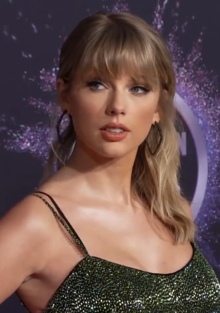

In [32]:
my_image =Image.open("output.png")
sample_image = Image.open("test.png")
sample_image



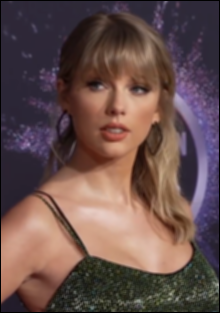

In [33]:
output_image

*Gaussian blur*

In [37]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("test.png")
input_pixels = input_image.load()

# Gaussian kernel
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

# Select kernel here:
kernel = gaussian_kernel 

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]

        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
    
output_image.save("output2.png")


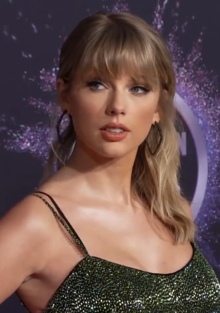

In [39]:
my_image2 =Image.open("output2.png")
sample_image

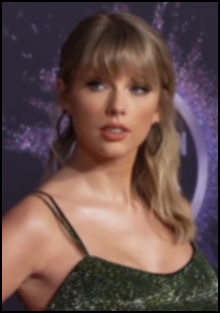

In [40]:
my_image2